(50, 2)
(50, 1)
iteration times: 0
W: [[0.5645772 ]
 [0.02206984]] 
b: [0.00641565] 
Train Loss: 76156.49
Test Loss: 98961.82

iteration times: 100000
W: [[  7.5448966]
 [-73.14719  ]] 
b: [7.3848915] 
Train Loss: 180.83264
Test Loss: 176.89725

iteration times: 200000
W: [[  7.490585]
 [-73.135925]] 
b: [13.369146] 
Train Loss: 158.61414
Test Loss: 172.60788

iteration times: 300000
W: [[  7.39606]
 [-73.09817]] 
b: [18.826332] 
Train Loss: 113.89313
Test Loss: 118.476395

iteration times: 400000
W: [[  7.3441086]
 [-73.07985  ]] 
b: [23.832792] 
Train Loss: 95.63794
Test Loss: 108.74159

iteration times: 500000
W: [[  7.236917]
 [-72.922005]] 
b: [28.403337] 
Train Loss: 81.04605
Test Loss: 60.526886

iteration times: 600000
W: [[  7.2768903]
 [-72.95767  ]] 
b: [32.64697] 
Train Loss: 78.6926
Test Loss: 123.1213

iteration times: 700000
W: [[  7.225139]
 [-72.88929 ]] 
b: [36.519886] 
Train Loss: 62.80622
Test Loss: 105.63192

iteration times: 800000
W: [[  7.0969806]
 [-72.79086  ]

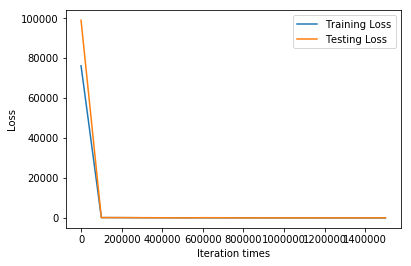

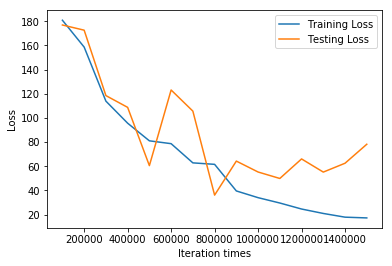

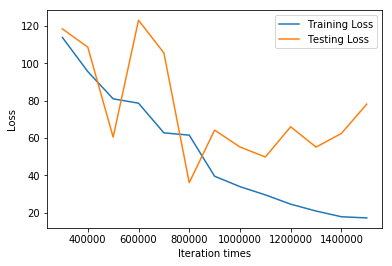

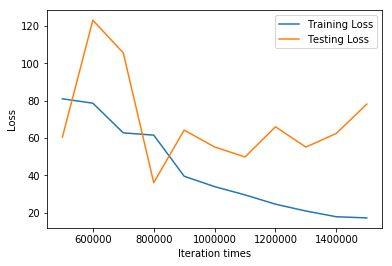

Train Loss:
 [76156.49, 180.83264, 158.61414, 113.89313, 95.63794, 81.04605, 78.6926, 62.80622, 61.58669, 39.5734, 34.01106, 29.583712, 24.610846, 20.94027, 17.871859, 17.251762]

Test Loss:
 [98961.82, 176.89725, 172.60788, 118.476395, 108.74159, 60.526886, 123.1213, 105.63192, 36.12806, 64.27941, 55.243153, 49.90051, 66.06319, 55.178253, 62.50599, 78.21251]


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing   

# Try to find value for W and b to compute y_data = x_data * W + b  

# Define dimensions
d = 2    # Size of the parameter space
N = 50 # Number of data sample

# Model parameters
W = tf.Variable(tf.zeros([d, 1], tf.float32), name="weights")
b = tf.Variable(tf.zeros([1], tf.float32), name="biases")

# Model input and output
x = tf.placeholder(tf.float32, shape=[None, d])
y = tf.placeholder(tf.float32, shape=[None, 1])

# hypothesis
linear_regression_model = tf.add(tf.matmul(x, W), b)
# cost/loss function
loss = tf.reduce_mean(tf.square(linear_regression_model - y)) / 2

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000015)
train = optimizer.minimize(loss)

training_filename = "dataForTraining.txt"
testing_filename = "dataForTesting.txt"
training_dataset = np.loadtxt("dataForTraining.txt")
testing_dataset = np.loadtxt("dataForTesting.txt")

dataset = np.vstack((training_dataset,testing_dataset))
min_max_scaler = preprocessing.MinMaxScaler()  
dataset = min_max_scaler.fit_transform(dataset)

# x_train = np.array(training_dataset[:,:2])
# y_train = np.array(training_dataset[:,2:3])
# x_test = np.array(testing_dataset[:,:2])
# y_test = np.array(testing_dataset[:,2:3])
x_train = np.array(training_dataset[:,:2])
y_train = np.array(training_dataset[:,2:3])
x_test = np.array(testing_dataset[:,:2])
y_test = np.array(testing_dataset[:,2:3])
print(x_train.shape)
print(y_train.shape)

save_step_loss = {"step":[],"train_loss":[],"test_loss":[]}# 保存step和loss用于可视化操作

# mini_batch_size = 5
# n_batch = N // mini_batch_size + (N % mini_batch_size != 0)
# print(n_batch)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)  # reset values to wrong
    steps = 1500001
    for i in range(steps):
#         i_batch = (i % n_batch)*mini_batch_size
#         batch = x_train[i_batch:i_batch+mini_batch_size], y_train[i_batch:i_batch+mini_batch_size]
#         sess.run(train, {x: batch[0], y:batch[1]})
        random_index = np.random.choice(N)
        sess.run(train, {x: [x_train[random_index]], y:[y_train[random_index]]})
        if i % 100000 == 0:
            # evaluate training accuracy
            print("iteration times: %s" % i)
            curr_W, curr_b, curr_train_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
            print("W: %s \nb: %s \nTrain Loss: %s" % (curr_W, curr_b, curr_train_loss))
            # Accuracy computation
            curr_test_loss = sess.run(loss,{x:x_test,y:y_test})
            print("Test Loss: %s\n" % curr_test_loss)
            save_step_loss["step"].append(i)
            save_step_loss["train_loss"].append(curr_train_loss)
            save_step_loss["test_loss"].append(curr_test_loss)

#画图损失函数变化曲线
plt.plot(save_step_loss["step"],save_step_loss["train_loss"],label='Training Loss')
plt.plot(save_step_loss["step"],save_step_loss["test_loss"],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][1:],save_step_loss["train_loss"][1:],label='Training Loss')
plt.plot(save_step_loss["step"][1:],save_step_loss["test_loss"][1:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][3:],save_step_loss["train_loss"][3:],label='Training Loss')
plt.plot(save_step_loss["step"][3:],save_step_loss["test_loss"][3:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][5:],save_step_loss["train_loss"][5:],label='Training Loss')
plt.plot(save_step_loss["step"][5:],save_step_loss["test_loss"][5:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Train Loss:\n',save_step_loss["train_loss"])
print('')
print('Test Loss:\n',save_step_loss["test_loss"])